In [2]:
import sys
if "../" not in sys.path:
    sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from tsap.option_pricing import OptionPricing

# read GOOG data
goog = np.genfromtxt("../data/GOOG.csv", delimiter=",")

# set Black-Scholes equation parameters
sigma = np.std((goog[1:] - goog[:-1]) / goog[:-1])
r = 0.005
T = 90
K = 800
Smax = K*2.5

# test optionPricing class
option_price = OptionPricing(sigma=sigma, r=r, T=T, K=K, Smax=Smax)
nS = 100
nt = 300
option_price.solve_black_scholes(nS=nS, nt=nt)

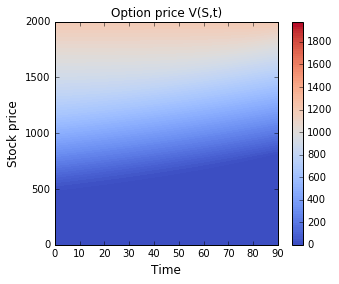

In [2]:
# define (S,t) grids
S = np.linspace(0, Smax, nS + 1)
t = np.linspace(0, T, nt + 1)
t, S = np.meshgrid(t, S)
levels = np.arange(0, Smax, float(Smax) / nS)

# visualize V(S,t)
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
plt.figure()
plt.contourf(
    t, S, option_price.V, levels,
    cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
plt.colorbar()
plt.xlabel("Time", fontsize=12)   
plt.ylabel("Stock price", fontsize=12)
plt.xlim([0,T])
plt.ylim([0,Smax])
plt.title("Option price V(S,t)", fontsize=12)
plt.show()